Mar 2015, J. Slavič in L. Knez

In [1]:
from sympy import *
init_printing()

# Do naslednjih vaj preštudirajte sledeče:

Na sliki je prikazano paličje. Ob delovanju sil $F_1$ in $F_2$ se v palicah razvijejo notranje sile $P_i$. Dimenzije paličja zagotavljajo kota $\alpha$ in $\beta$.
<img src="../fig/palicje_2.2_15.png" width=300>
Sile v palicah izračunamo s pomočjo sistema linearnih enačb.

(Opomba: naloga je posplošitev naloge 15 na strani 81 v knjige Numerical methods in Eng with Py 3 z nastavkom za rešitev:
<img src="../fig/palicje_2.2_15_resitev.png" width=300>

V omenjenem viru je sicer napaka v predzadnji vrstici matrike koeficientov.

Vprašanje 1: V simbolni obliki zapišite ravnotežje sil za točko 1 v $x$ in $y$ smeri 

Vprašanje 2: V simbolni obliki zapišite ravnotežje sil za točko 2 v $x$ in $y$ smeri.

Vprašanje 3: V simbolni obliki zapišite ravnotežje sil za točko 3 v $x$ in $y$ smeri.

In [2]:
P1, P2, P3, P4, P5, P6, F1, F2, alpha, beta = symbols('P1, P2, P3, P4, P5, P6, F1, F2, alpha, beta')

# Točka 1
eq1x = Eq(-P1 - P3*cos(alpha) + P2,0)
eq1y = Eq(P3*sin(alpha) + P4 - F1,0)

# Točka 2
eq2x = Eq(-P2 - P5*cos(beta),0)
eq2y = Eq(P5*sin(beta)-F2,0)

# Točka 3
eq3x = Eq(-P6 + P5*sin(pi/2-beta),0)
eq3y = Eq(-P4 - P5*cos(pi/2-beta),0)

# Spravimo skupaj v seznam
eqs = [eq1x, eq1y, eq2x, eq2y, eq3x, eq3y]
eqs

Vprašanje 4: Najdite simbolično rešitev za sile $P_i$.

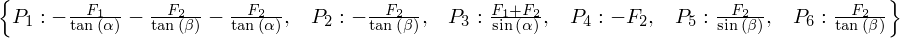

In [3]:
# Simbolično rešimo zgornji sistem
sol = solve(eqs, [P1, P2, P3, P4, P5, P6])
sol

Vprašanje 5: Uporabite podatke: $\alpha=\beta=\pi/4$, $F_1=18$ kN in $F_2=12$ kN ter najdite številčno rešitev.

In [4]:
# Vstavim podatke z izpeljevanjem (to naredimo tako, ker imamo seznam in ne pozna direktno ukaza subs)
eqs2 = [_.subs({alpha: pi/4, beta: pi/4, F1: 18000, F2: 12000}).evalf() for _ in eqs]
eqs2

In [5]:
# Rešimo sistem
sol = solve(eqs2, [P1, P2, P3, P4, P5, P6])
sol

Vprašanje 6: Pripravite si funkcijo, ki bo za poljubne podatke (npr: ``podatki = {a: pi/4, b: pi/4, F1: 18000, F2: 12000}``) vrnila numerično matriko koeficientov $\mathbf{A}$ in vektor konstat $\mathbf{b}$. Če ne uspete tega narediti avtomatizirano, delajte "na roke" (splača se vam potruditi, saj bomo to večkrat rabili).

In [6]:
import numpy as np

# Vrednosti neznank nastavimo na 0, tako se v A in b ne bodo pojavljale
neznanke = [P1, P2, P3, P4, P5, P6]
subst = {P1: 0, P2: 0, P3: 0, P4: 0, P5:0, P6: 0}

def getA_b(podatki = {alpha: pi/4, beta: pi/4, F1: 18000, F2: 12000}):
    A = np.asarray([[eq.args[0].subs(podatki).evalf().coeff(p) for p in neznanke] for eq in eqs])
    b = -np.asarray([eq.args[0].subs(podatki).subs(subst).evalf() for eq in eqs])   
    return A, b


Nekaj komentarjev na zgornjo funkcijo:

* Najprej iz sistema eqs z izpeljevanjem preberemo posamezno enačbo, ki jo poimenujemo eq.
* Ko izpeljujemo b vstavimo podatke in vse vrednosti za *Pi* kot 0, preostale številke pa množimo z -1, ker smo jih dali na drugo stran enačbe.
* *eq.args[0]* pomeni, da uporabimo le zapis na levi strani enačbe, na desni strani je 0.
* Ukaz *.coeff(p)* poišče vse koeficiente, ki se nahajajo pred trenutno neznanako "p".
* *np.asarray* poskrbi, da se vrednosti shranijo v numerični obliki.

In [7]:
# Uporabimo že kar predpripravljen slovar v funkciji, lahko pa bi napisali poljubnega
A, b = getA_b()  

In [8]:
A

array([[-1, 1, -0.707106781186548, 0, 0, 0],
       [0, 0, 0.707106781186548, 1, 0, 0],
       [0, -1, 0, 0, -0.707106781186548, 0],
       [0, 0, 0, 0, 0.707106781186548, 0],
       [0, 0, 0, 0, 0.707106781186548, -1],
       [0, 0, 0, -1, -0.707106781186548, 0]], dtype=object)

In [9]:
b

array([0, 18000.0000000000, 0, 12000.0000000000, 0, 0], dtype=object)

In [10]:
# Rešimo sistem
P = np.linalg.solve(A, b)
P

array([-42000.        , -12000.        ,  42426.40687119, -12000.        ,
        16970.56274848,  12000.        ])